In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
df = pd.read_csv("/content/ideaspiceemployeeturnoverdatset.csv")

In [21]:
# Set data types
for col in ['Age', 'DailyBilling', 'HourBilling', 'MonthlyBilling',
            'MonthlyRate', 'Work Experience', 'PercentSalaryHike',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
            'YearsWithCurrentManager', 'DistanceFromHome']:
    df[col] = df[col].astype(int)

    # Remove outliers
    percentile_3 = df[col].quantile(0.03)
    percentile_97 = df[col].quantile(0.97)
    df.loc[((df[col] < percentile_3) | (df[col] > percentile_97)), col] = np.nan


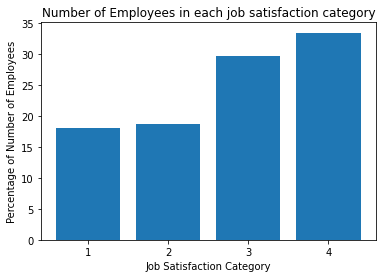

In [22]:
# Histogram of employee satisfaction
df_hist = df.groupby('JobSatisfaction')['EmployeId'].count().to_frame()

# Calculate % from these numbers
df_hist = (df_hist.assign(percentage=df_hist['EmployeId']
           .apply(lambda x: x*100 / df_hist['EmployeId'].sum())))

plt.bar(df_hist.index, df_hist['percentage'])
plt.xticks(df_hist.index)
plt.title('Number of Employees in each job satisfaction category')
plt.xlabel('Job Satisfaction Category')
plt.ylabel('Percentage of Number of Employees')
plt.show()

Based on this figure, 'Sales Executive', 'Research Scientist' & 'Laboratory Technician' are the most unhappy roles.


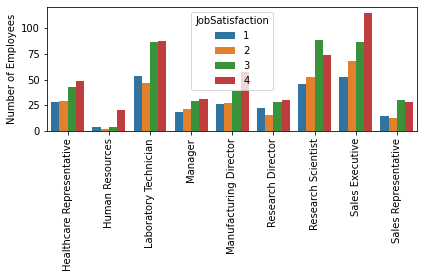

In [23]:
# Barplot of roles vs job satisfaction category count
df3 = (df.groupby(['Role', 'JobSatisfaction'])['EmployeId'].count()
       .rename_axis(['Role', 'JobSatisfaction']).reset_index())

fig = sns.barplot(data=df3, x='Role', y='EmployeId', hue='JobSatisfaction')
fig.set_xticklabels(labels=fig.get_xticklabels(), rotation=90)
fig.set_xlabel('')
fig.set_ylabel('Number of Employees')

plt.tight_layout()

print("Based on this figure, 'Sales Executive', 'Research Scientist' & "
      "'Laboratory Technician' are the most unhappy roles.")

plt.show()

18% of the employees left
Role
Healthcare Representative    13
Human Resources               8
Laboratory Technician        68
Manager                       5
Manufacturing Director       18
Research Director             6
Research Scientist           57
Sales Executive              57
Sales Representative         35
Name: Role, dtype: int64 
-----------------------------
Based on this chart, 'Sales Executive', 'Research Scientist' & 'Laboratory Technician' are the roles that saw the most loss of employees


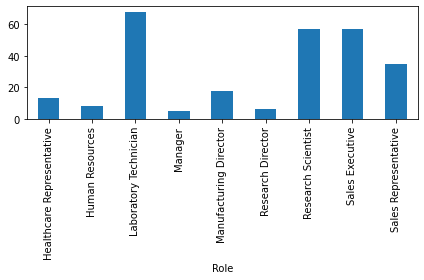

In [24]:
# Get % of employees who left
employees_left = round(len(df.query("Turnover == 'Yes'")) * 100 / len(df))
print(f"{employees_left}% of the employees left")

# Of all the employees who left find out how many belonged to each role
df_left = df.query("Turnover == 'Yes'")
df_role = df_left.groupby('Role')['Role'].count()

print(df_role, '\n-----------------------------')
df_role.plot(kind='bar')
plt.tight_layout()

print("Based on this chart, 'Sales Executive', 'Research Scientist' & "
      "'Laboratory Technician' are the roles that saw the most loss of "
      "employees")

plt.show()

In [16]:
# Let's explore the percent salary hike column for these 3 roles
unhappy_roles = ['Laboratory Technician', 'Sales Executive',
                 'Research Scientist']

df_left = df.query("Role in @unhappy_roles")


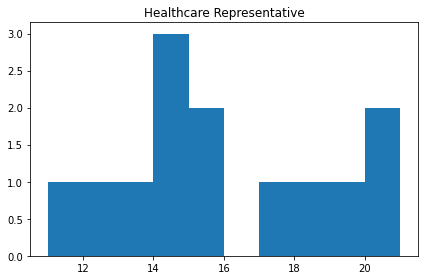

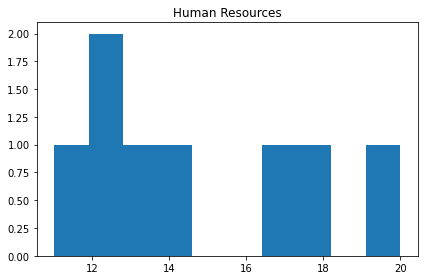

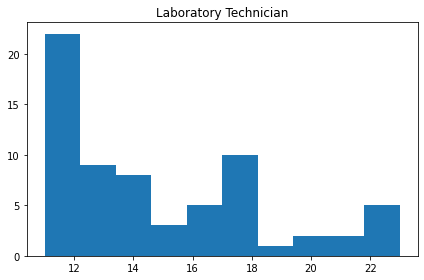

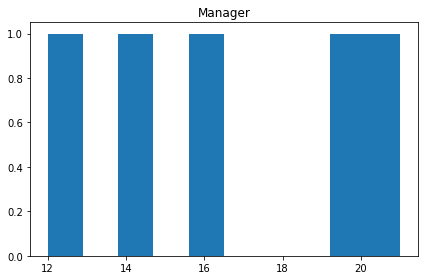

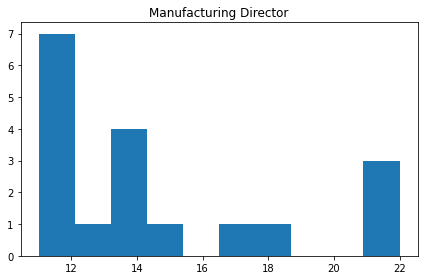

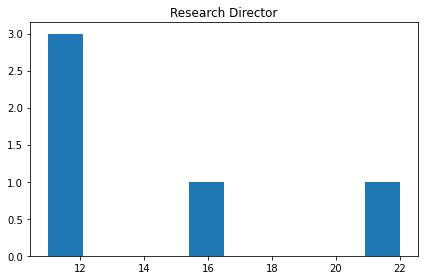

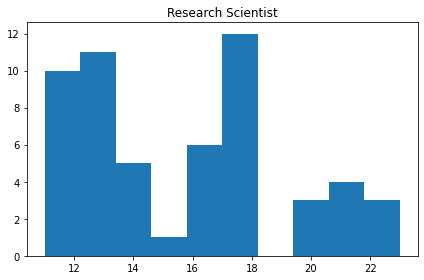

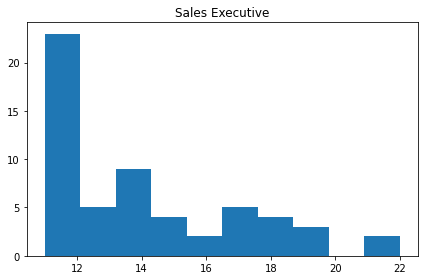

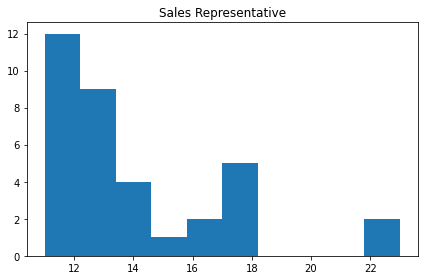

In [25]:
# Loop over each role and create a histogram of their salary hikes
for role, df_g in df_left.groupby('Role'):
    plt.hist(df_g['PercentSalaryHike'])
    plt.title(role)
    plt.tight_layout()
    plt.show()


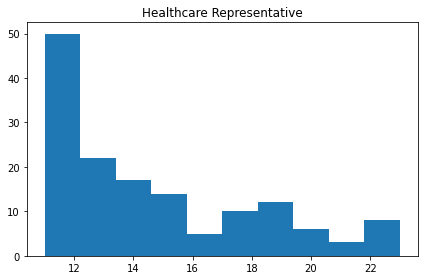

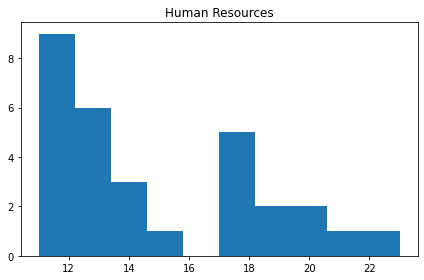

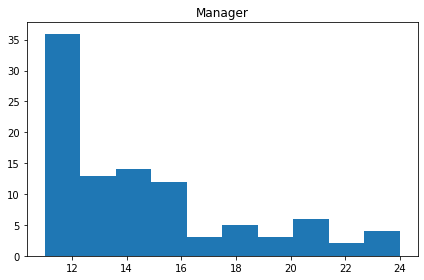

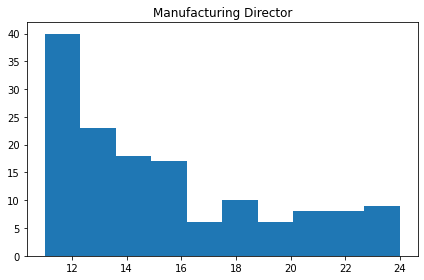

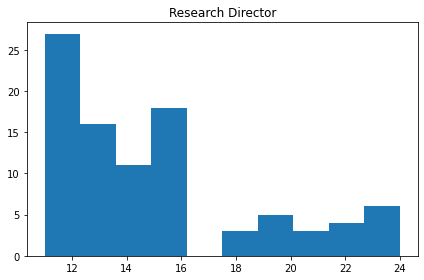

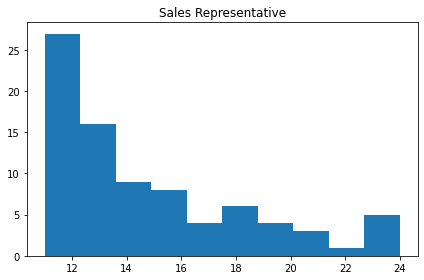

In [26]:
# Now just to confirm whether the other roles got better salary hikes, create
# those bar charts as well
df_stay = df.query("Role not in @unhappy_roles")

# Loop over each role and create a histogram of their salary hikes
for role, df_g in df_stay.groupby('Role'):
    plt.hist(df_g['PercentSalaryHike'])
    plt.title(role)
    plt.tight_layout()
    plt.show()